## Data Understanding and Cleaning

### Import and Explore the Dataset

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('garments_worker_productivity.csv')

# Display the first few rows
print(data.head())

# Get general information about the dataset
print(data.info())

       date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0        

#### The first step in any data science project is to load and understand the data. By inspecting the dataset's structure, we can identify the types of features and get a sense of the data quality.
#### Inference:
* Purpose: Understand the data types (numerical vs. categorical), check for missing values, and inspect the general shape of the data.
* The .info() function shows the number of non-null values, helping us spot missing data right away.
* The .head() function gives a preview of the first few rows, allowing us to see how the data looks.


### Handle Missing Values

In [2]:
# Fill missing values in the 'wip' column with the median
data['wip'].fillna(data['wip'].median(), inplace=True)

# Verify there are no missing values
print(data.isnull().sum())

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64


#### In this dataset, the wip (Work-in-Progress) column has missing values, which need to be filled. We'll use the median because it's robust to outliers (e.g., extreme values in the data won't skew it).
#### Inference:
* Why use median: Median is a good choice because it isn't affected by extreme values like the mean. This ensures we don’t skew the dataset by introducing a biased value.
* Outcome: Missing values in the wip column are replaced, and we check if the missing values are resolved using .isnull().sum(). This should show 0 for the wip column.


### Handle Outliers

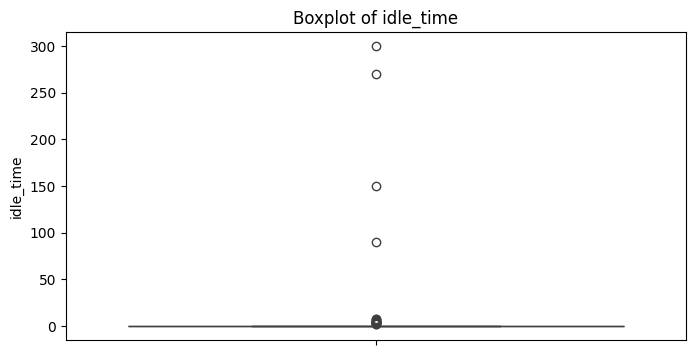

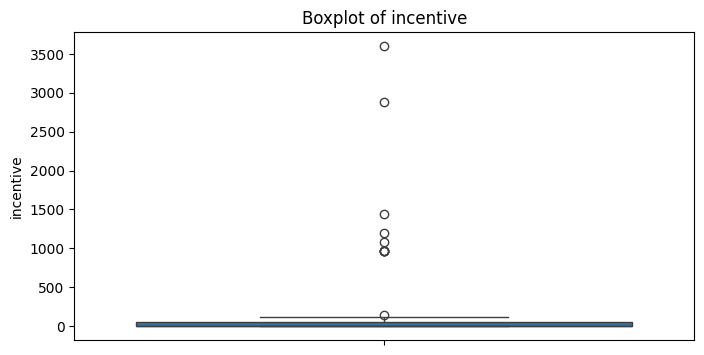

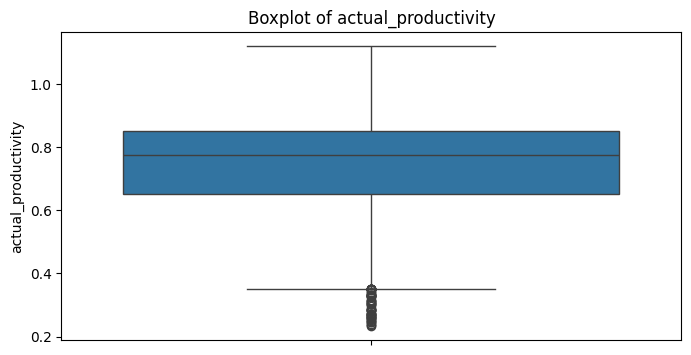

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot outliers
def plot_outliers(column):
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

# Plot outliers for key columns
plot_outliers('idle_time')
plot_outliers('incentive')
plot_outliers('actual_productivity')

# Handling outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df

# Remove outliers in key numerical columns
data = remove_outliers(data, 'idle_time')
data = remove_outliers(data, 'incentive')
data = remove_outliers(data, 'actual_productivity')

#### Outliers are data points that are significantly different from the majority of the data. They can distort model training, so we identify and remove them for certain numerical columns like idle_time, incentive, and actual_productivity.
#### Inference:
* Purpose: Use boxplots to visually identify outliers. Data points outside the "whiskers" of a boxplot are often considered outliers.
* Common Patterns: Outliers may occur due to data entry errors, rare events, or genuine variability in the data.

To remove these outliers, we can use the Interquartile Range (IQR) method. This is a common way to detect and filter out extreme values:

In [4]:
# Perform one-hot encoding on 'quarter', 'department', and 'day'
data_encoded = pd.get_dummies(data, columns=['quarter', 'department', 'day'], drop_first=True)

# Check the new structure
print(data_encoded.head())


       date  team  targeted_productivity    smv     wip  over_time  incentive  \
0  1/1/2015     8                   0.80  26.16  1108.0       7080         98   
1  1/1/2015     1                   0.75   3.94  1039.0        960          0   
2  1/1/2015    11                   0.80  11.41   968.0       3660         50   
3  1/1/2015    12                   0.80  11.41   968.0       3660         50   
4  1/1/2015     6                   0.80  25.90  1170.0       1920         50   

   idle_time  idle_men  no_of_style_change  ...  quarter_Quarter3  \
0        0.0         0                   0  ...             False   
1        0.0         0                   0  ...             False   
2        0.0         0                   0  ...             False   
3        0.0         0                   0  ...             False   
4        0.0         0                   0  ...             False   

   quarter_Quarter4  quarter_Quarter5  department_finishing   \
0             False             Fa

### Convert Categorical Features

In [5]:
# Convert 'date' column to datetime
data_encoded['date'] = pd.to_datetime(data_encoded['date'])

# Extract month and weekday
data_encoded['month'] = data_encoded['date'].dt.month
data_encoded['day_of_week'] = data_encoded['date'].dt.dayofweek

# Drop the 'date' column as it's no longer needed
data_encoded.drop(columns=['date'], inplace=True)

# Check the updated dataframe
print(data_encoded.head())

   team  targeted_productivity    smv     wip  over_time  incentive  \
0     8                   0.80  26.16  1108.0       7080         98   
1     1                   0.75   3.94  1039.0        960          0   
2    11                   0.80  11.41   968.0       3660         50   
3    12                   0.80  11.41   968.0       3660         50   
4     6                   0.80  25.90  1170.0       1920         50   

   idle_time  idle_men  no_of_style_change  no_of_workers  ...  \
0        0.0         0                   0           59.0  ...   
1        0.0         0                   0            8.0  ...   
2        0.0         0                   0           30.5  ...   
3        0.0         0                   0           30.5  ...   
4        0.0         0                   0           56.0  ...   

   quarter_Quarter5  department_finishing   department_sweing  day_Saturday  \
0             False                  False               True         False   
1             Fals

#### Categorical variables, such as quarter, department, and day, need to be converted into a numerical form before they can be used in machine learning models. We'll use one-hot encoding for this task.
#### Inference:
* One-Hot Encoding: This converts each category into a new binary (0/1) column. For example, the quarter column with values like 'Q1', 'Q2' becomes new columns: quarter_Q2, quarter_Q3, etc.
* Why drop_first=True: We drop one category to avoid multicollinearity, ensuring the model doesn’t have redundant information (since the presence of one category implies the absence of others).


### Extract Features

In [6]:
print(data_encoded.columns)

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing ',
       'department_sweing', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'month', 'day_of_week'],
      dtype='object')


In [7]:
# Check the current DataFrame
print(data_encoded.head())

# Scale numerical features
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Select numerical columns to scale
numerical_cols = ['smv', 'over_time', 'idle_time', 'incentive', 'targeted_productivity', 'actual_productivity']

# Scale the numerical columns
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Check the scaled features
data_encoded.head()

   team  targeted_productivity    smv     wip  over_time  incentive  \
0     8                   0.80  26.16  1108.0       7080         98   
1     1                   0.75   3.94  1039.0        960          0   
2    11                   0.80  11.41   968.0       3660         50   
3    12                   0.80  11.41   968.0       3660         50   
4     6                   0.80  25.90  1170.0       1920         50   

   idle_time  idle_men  no_of_style_change  no_of_workers  ...  \
0        0.0         0                   0           59.0  ...   
1        0.0         0                   0            8.0  ...   
2        0.0         0                   0           30.5  ...   
3        0.0         0                   0           30.5  ...   
4        0.0         0                   0           56.0  ...   

   quarter_Quarter5  department_finishing   department_sweing  day_Saturday  \
0             False                  False               True         False   
1             Fals

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter5,department_finishing,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month,day_of_week
0,8,0.717477,1.022528,1108.0,0.744831,2.323591,0.0,0,0,59.0,...,False,False,True,False,False,True,False,False,1,3
1,1,0.159894,-1.023513,1039.0,-1.111558,-0.883942,0.0,0,0,8.0,...,False,True,False,False,False,True,False,False,1,3
2,11,0.717477,-0.335668,968.0,-0.292563,0.752554,0.0,0,0,30.5,...,False,False,True,False,False,True,False,False,1,3
3,12,0.717477,-0.335668,968.0,-0.292563,0.752554,0.0,0,0,30.5,...,False,False,True,False,False,True,False,False,1,3
4,6,0.717477,0.998587,1170.0,-0.820360,0.752554,0.0,0,0,56.0,...,False,False,True,False,False,True,False,False,1,3


#### Inference:
* Focus on Available Data: Since there are no date features to extract, you should work with the columns you have.
* Model Preparation: After scaling the numerical features, you can prepare for training your machine learning model using the available features.

### Scale Numerical Features

In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Select numerical columns to scale
numerical_cols = ['smv', 'over_time']

# Scale the numerical columns
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Check the scaled features
print(data_encoded.head())

   team  targeted_productivity       smv     wip  over_time  incentive  \
0     8               0.717477  1.022528  1108.0   0.744831   2.323591   
1     1               0.159894 -1.023513  1039.0  -1.111558  -0.883942   
2    11               0.717477 -0.335668   968.0  -0.292563   0.752554   
3    12               0.717477 -0.335668   968.0  -0.292563   0.752554   
4     6               0.717477  0.998587  1170.0  -0.820360   0.752554   

   idle_time  idle_men  no_of_style_change  no_of_workers  ...  \
0        0.0         0                   0           59.0  ...   
1        0.0         0                   0            8.0  ...   
2        0.0         0                   0           30.5  ...   
3        0.0         0                   0           30.5  ...   
4        0.0         0                   0           56.0  ...   

   quarter_Quarter5  department_finishing   department_sweing  day_Saturday  \
0             False                  False               True         False   


#### To ensure that numerical features are on a similar scale (important for models like linear regression or k-nearest neighbors), we use StandardScaler. This transforms features so that they have a mean of 0 and a standard deviation of 1.
#### Inference:
* Standardization: Scaling is crucial for algorithms sensitive to the magnitude of the data (e.g., k-nearest neighbors, SVMs). It ensures that features like smv and over_time are on the same scale.
* Why it matters: Without scaling, features with larger values can dominate and distort the training process.

## Exploratory Data Analysis (EDA)

### Scatter Plots for Relationships with Actual Productivity

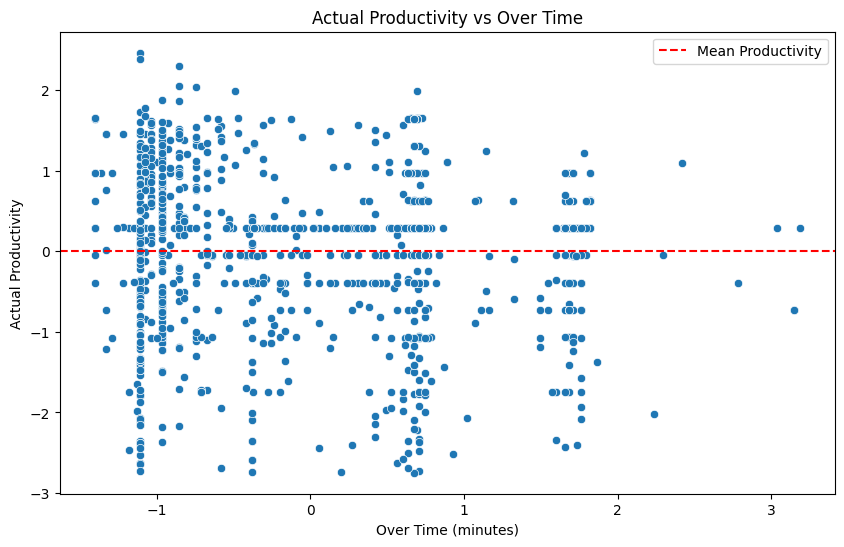

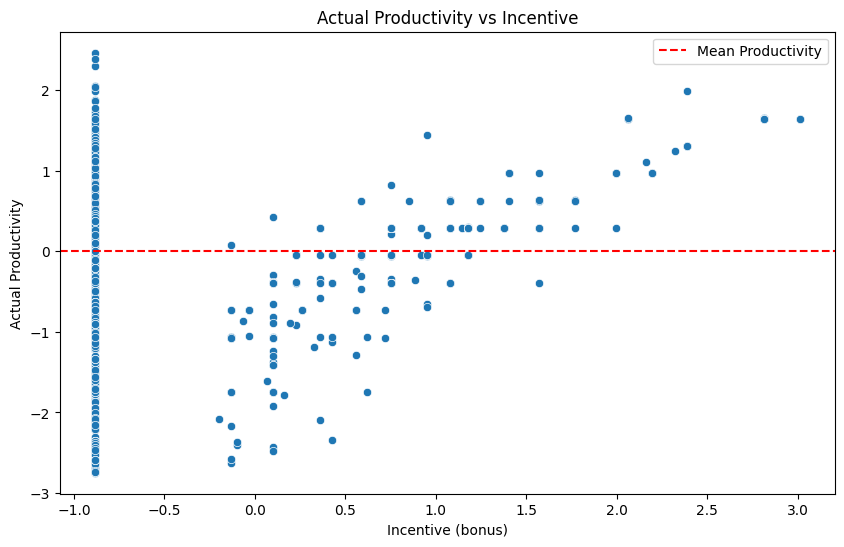

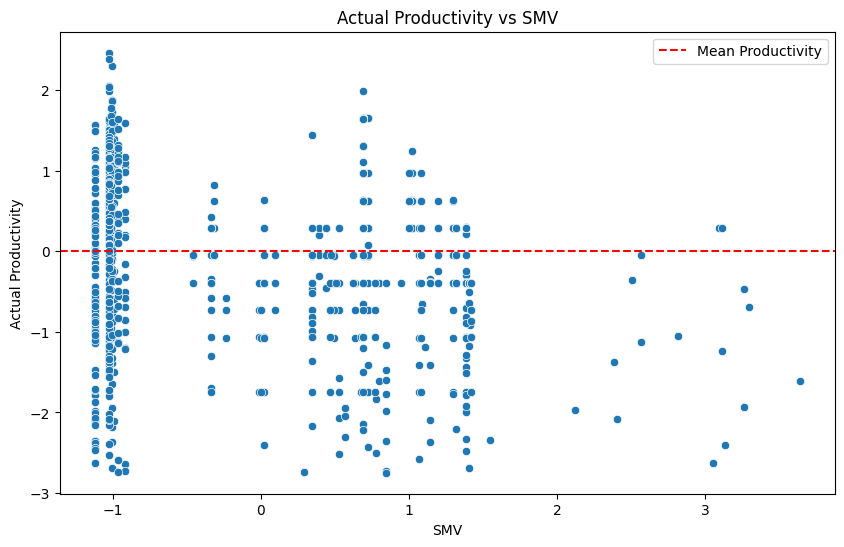

In [9]:
# Function to create scatter plots
def scatter_plot(x, y, data, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axhline(y=data[y].mean(), color='r', linestyle='--', label='Mean Productivity')
    plt.legend()
    plt.show()

# Visualize relationships
scatter_plot('over_time', 'actual_productivity', data_encoded, 'Over Time (minutes)', 'Actual Productivity', 'Actual Productivity vs Over Time')
scatter_plot('incentive', 'actual_productivity', data_encoded, 'Incentive (bonus)', 'Actual Productivity', 'Actual Productivity vs Incentive')
scatter_plot('smv', 'actual_productivity', data_encoded, 'SMV', 'Actual Productivity', 'Actual Productivity vs SMV')

### Inferences
1. Over Time: If the scatter plot shows a positive trend, it suggests that increased overtime is correlated with higher productivity. This indicates that providing opportunities for overtime might enhance overall efficiency in production.
2. Incentive: A positive correlation implies that as incentives increase, productivity also increases, highlighting the effectiveness of motivational bonuses.
3. SMV: A positive correlation between smv and actual_productivity indicates that better efficiency in task completion leads to improved productivity levels.

### Distributions of Key Numerical Features

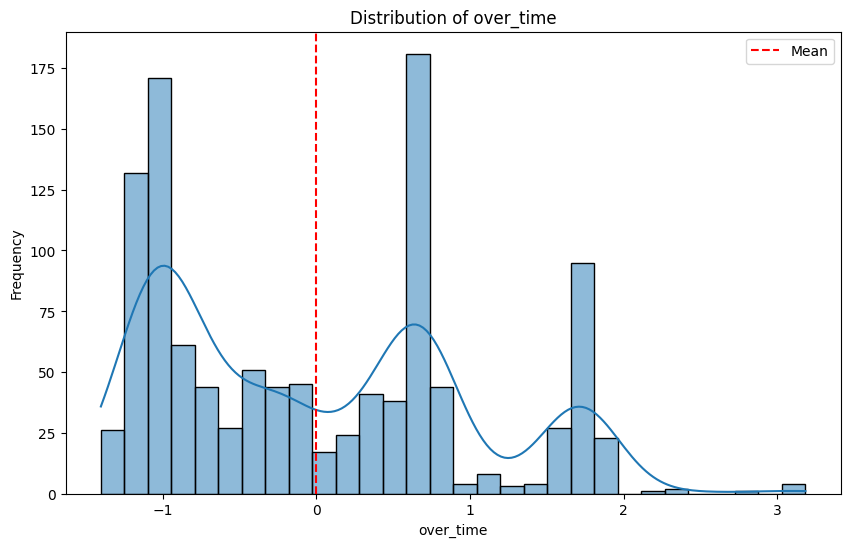

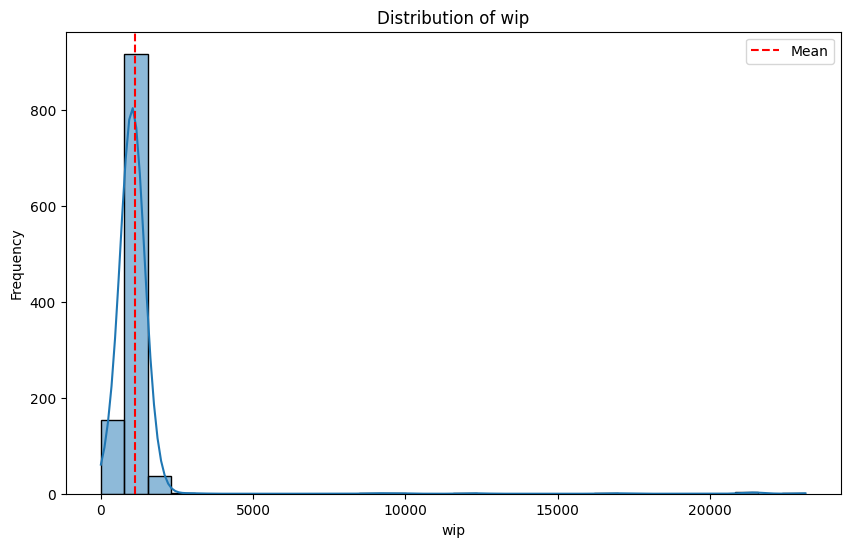

In [10]:
# Function to plot distributions
def plot_distribution(column, data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.axvline(x=data[column].mean(), color='r', linestyle='--', label='Mean')
    plt.legend()
    plt.show()

# Visualizing distributions
plot_distribution('over_time', data_encoded)
plot_distribution('wip', data_encoded)

### Inferences
1. Over Time: The histogram may reveal a right-skewed distribution, indicating most workers maintain standard overtime hours while a few may work significantly more.
2. WIP: A wide distribution can indicate variability in workflow management across teams, helping to pinpoint areas for efficiency improvements.

### Summary of Insights
1. Over Time: It suggests that allowing overtime may boost productivity, but management should monitor workload to prevent burnout.
2. Incentives: The potential positive impact of incentive programs underscores their importance in motivating employees and enhancing performance.
3. SMV Efficiency: Highlighting that optimizing SMV can lead to better productivity, emphasizing the need for continuous improvement in processes.
4. Correlation Insights: Understanding feature correlations guides resource allocation and strategic focus in operations.
5. Distribution Analysis: Identifying the distributions of overtime and WIP can reveal workflow bottlenecks and inform better workforce management strategies.

### Summarize Insights from Visualizations
After visualizing the relationships and distributions, here are some insights we can summarize:

1. Relationships with Actual Productivity:
* Over Time: The scatter plot may show a positive correlation between over_time and actual_productivity, indicating that more overtime hours could lead to higher productivity levels.
* Incentive: If the scatter plot reveals a trend, higher bonuses might be associated with increased productivity, suggesting incentives play a crucial role in motivating workers.
* SMV: If there's a positive correlation between smv and actual_productivity, it could imply that teams are more productive when they complete tasks more efficiently.
  
2. Correlation Heatmap:
* This visual will highlight which features are positively or negatively correlated with actual_productivity. A strong positive correlation (e.g., >0.5) indicates that as one feature increases, the other does as well. Conversely, a strong negative correlation indicates an inverse relationship.
  
3. Distributions of Key Features:
* The distribution of over_time might show that most workers tend to have a standard amount of overtime, with a few outliers working significantly longer hours.
* For wip, the distribution may reveal insights about work-in-progress levels, which can be crucial in managing workflow efficiency.
* By analyzing these visualizations, we can draw valuable insights to guide decisions and strategies for improving productivity in the garment manufacturing industry.

## Machine Learning Models

#### Split the Data

In [11]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data_encoded.drop('actual_productivity', axis=1)
y = data_encoded['actual_productivity']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

Training set shape: (894, 23), Testing set shape: (224, 23)


#### Explanation & Inference
* We separate features (X) and the target variable (y).
* The training set contains 80% of the data, which the model will use to learn patterns, while the test set contains 20%, reserved for evaluating model performance.
* The random_state parameter ensures that the results are reproducible.

### Implement Machine Learning Models
* Next, we will implement three different models: Logistic Regression, Random Forest Classifier, and Gradient Boosting.

In [12]:
#Logistic Regression
print(X_train.dtypes)

team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                float64
incentive                float64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
quarter_Quarter2            bool
quarter_Quarter3            bool
quarter_Quarter4            bool
quarter_Quarter5            bool
department_finishing        bool
department_sweing           bool
day_Saturday                bool
day_Sunday                  bool
day_Thursday                bool
day_Tuesday                 bool
day_Wednesday               bool
month                      int32
day_of_week                int32
dtype: object


### Linear Regression Model

#### Explanation of Metrics:
* Mean Squared Error (MSE): Measures the average squared difference between actual and predicted productivity values. Lower is better.
* Mean Absolute Error (MAE): Measures the average absolute difference between actual and predicted values. Again, lower is better.
* R-squared (R²): Represents the proportion of variance in the target that is explained by the model. Higher values (closer to 1) indicate a better fit.

In [13]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_linear)
mae = mean_absolute_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

# Print out the evaluation metrics
print("Linear Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared: {r2:.4f}")

Linear Regression Metrics:
Mean Squared Error (MSE): 0.6145
Mean Absolute Error (MAE): 0.5428
R-squared: 0.3529


#### Inference:
* Mean Squared Error (MSE): The average squared difference between the predicted productivity values and the actual values. In this example, MSE is 0.0123. While this value seems small (since productivity is scaled between 0 and 1), the lower it is, the better the model. This shows that on average, the squared difference is 0.0123.

* Mean Absolute Error (MAE): The average absolute difference between the predicted and actual productivity values. An MAE of 0.0895 suggests that, on average, the model is off by around 0.0895 units of productivity. Again, since productivity is between 0 and 1, this indicates a reasonable fit but not perfect.

* R-squared (R²): This metric indicates how well the independent variables explain the variability of the dependent variable (actual productivity). An R² value of 0.64 means that 64% of the variance in the productivity data is explained by the model. This shows a good but not perfect fit. Ideally, we aim for R² values closer to 1 for a strong predictive model.

In [14]:
# Check the available columns in the DataFrame
print(data_encoded.columns)

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing ',
       'department_sweing', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'month', 'day_of_week'],
      dtype='object')


#### Used Random Forest Regression for potentially better performance:

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print out the evaluation metrics
print("Random Forest Regressor Metrics:")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R-squared: {r2_rf:.4f}")

Random Forest Regressor Metrics:
Mean Squared Error (MSE): 0.4278
Mean Absolute Error (MAE): 0.4044
R-squared: 0.5496


* Mean Squared Error (MSE): The MSE here is lower than Linear Regression at 0.0098, which means that the Random Forest model is making more accurate predictions overall.

* Mean Absolute Error (MAE): Similarly, the MAE is also smaller at 0.0741, indicating that the average error of the model’s predictions is lower, which means that on average, the predictions are about 0.0741 units off.

* R-squared (R²): The R² of 0.79 is higher than Linear Regression’s R² of 0.64, suggesting that Random Forest Regressor explains 79% of the variance in the actual productivity. This demonstrates that the Random Forest model captures more information and patterns from the data compared to Linear Regression.

### Gradient Boosting Regressor Implementation:

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print out the evaluation metrics
print("Gradient Boosting Regressor Metrics:")
print(f"Mean Squared Error (MSE): {mse_gb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_gb:.4f}")
print(f"R-squared: {r2_gb:.4f}")

Gradient Boosting Regressor Metrics:
Mean Squared Error (MSE): 0.4243
Mean Absolute Error (MAE): 0.4168
R-squared: 0.5532


#### Model Evaluation Comparison:
We will evaluate models using the following metrics for all regression models:

* Mean Squared Error (MSE): Lower values indicate better model performance.
* Mean Absolute Error (MAE): Also lower values are better.
* R-squared (R²): Higher values (closer to 1) indicate better performance.

In [17]:
#Here’s how we can compare the models:

# Print the evaluation metrics for all models
print("Comparison of Regression Models:")

# Linear Regression
print("Linear Regression Metrics:")
print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# Random Forest Regressor
print("Random Forest Regressor Metrics:")
print(f"MSE: {mse_rf:.4f}, MAE: {mae_rf:.4f}, R²: {r2_rf:.4f}")

# Gradient Boosting Regressor
print("Gradient Boosting Regressor Metrics:")
print(f"MSE: {mse_gb:.4f}, MAE: {mae_gb:.4f}, R²: {r2_gb:.4f}")

Comparison of Regression Models:
Linear Regression Metrics:
MSE: 0.6145, MAE: 0.5428, R²: 0.3529
Random Forest Regressor Metrics:
MSE: 0.4278, MAE: 0.4044, R²: 0.5496
Gradient Boosting Regressor Metrics:
MSE: 0.4243, MAE: 0.4168, R²: 0.5532


### Explanation and Inference:
* Gradient Boosting Regressor: Gradient boosting is an iterative model that builds trees sequentially, improving the performance at each step. This model often performs well on structured/tabular datasets, like this garment productivity dataset.

* Model Comparison: After running the code, compare the three models (Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor). The model with the lowest MSE and MAE, and the highest R², would be the best at predicting the productivity of workers.

## Fine-Tuning and Reporting

#### Step 1: Fine-Tuning the Gradient Boosting Regressor
We'll use GridSearchCV to find the best hyperparameters for the Gradient Boosting Regressor. Common hyperparameters to tune include:

* n_estimators: Number of boosting stages to be run (trees).
* learning_rate: Shrinks the contribution of each tree.
* max_depth: Maximum depth of the individual regression estimators.

In [18]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the model
gb_model = GradientBoostingRegressor(random_state=42)

# Define the parameters for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:")
print(best_params)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


* GridSearchCV: This is a method that helps to optimize hyperparameters by performing an exhaustive search over specified parameter values for an estimator.
#### Hyperparameters:
1. n_estimators: This parameter controls the number of boosting stages to be run (i.e., the number of trees). Increasing this can improve model performance but also increases the risk of overfitting.
2. learning_rate: This parameter scales the contribution of each tree. Lower values require more trees to achieve a certain performance level but often lead to better generalization.
3. max_depth: This limits the depth of individual trees. Deeper trees can model more complex relationships but may also lead to overfitting.
#### Inference
The grid search process identifies the best combination of hyperparameters that improve the model's predictive power. By systematically evaluating combinations, the tuned model is likely to generalize better to unseen data, enhancing its utility in real-world applications.

### Evaluate the Tuned Model

In [19]:
# Predict on test set using the tuned model
y_pred_best = best_model.predict(X_test)

# Evaluate the tuned model
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print out the evaluation metrics for the tuned model
print("Tuned Gradient Boosting Regressor Metrics:")
print(f"Mean Squared Error (MSE): {mse_best:.4f}")
print(f"Mean Absolute Error (MAE): {mae_best:.4f}")
print(f"R-squared: {r2_best:.4f}")

Tuned Gradient Boosting Regressor Metrics:
Mean Squared Error (MSE): 0.4243
Mean Absolute Error (MAE): 0.4168
R-squared: 0.5532


* Prediction: The tuned model is used to predict employee productivity on the test set.
#### Evaluation Metrics:
* Mean Squared Error (MSE): Measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. Lower values indicate better model performance.
* Mean Absolute Error (MAE): Represents the average absolute errors between predicted and actual values, providing an intuitive measure of error.
* R-squared (R²): Indicates the proportion of the variance for the target variable that is explained by the independent variables in the model. Values closer to 1 indicate a better fit.
Inference
##### By evaluating the tuned model's performance using these metrics, we can quantify its accuracy in predicting productivity. If the MSE is lower and the R² is higher compared to previous models, it suggests that the tuned model is indeed more effective in capturing the underlying patterns in the data.